In [ ]:
# This did NOT work, the text had way too many new lines in it. Removing them all gave me one giant sentence
# with no spaces

from PyPDF2 import PdfFileReader
import re

reader = PdfFileReader("textrank algorithm paper.pdf")
num_pages = reader.numPages
page = reader.pages[0]
re.sub("\n", "", page.extractText())

Code below was obtained from [here](https://pdfminersix.readthedocs.io/en/latest/tutorial/composable.html)

In [24]:
from io import StringIO

from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def convert_pdf_to_string(file_path):
    output_string = StringIO()
    with open(file_path, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)

    return(output_string.getvalue())


Code below obtained from [here](https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python)

In [12]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_text(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

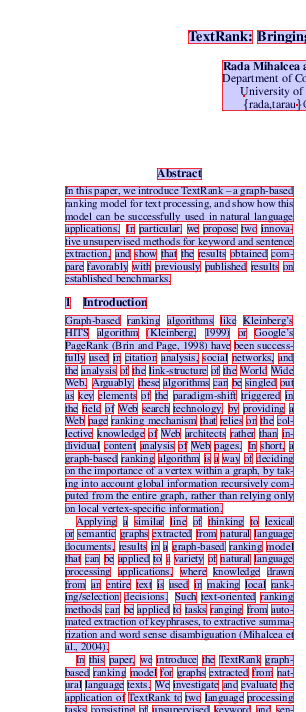

In [2]:
import pdfplumber

with pdfplumber.open("test papers/textrank algorithm paper.pdf") as pdf:
    page = pdf.pages[0]
    left = page.crop((0, 0, 0.5 * float(page.width), 0.9 * float(page.height)))
    right = page.crop((0.5 * page.width, 0, page.width, page.height))
    img = left.to_image()
    img.draw_rects(page.extract_words())
img

In [1]:
import PIL
PIL.__version__

'8.4.0'